# Exercise 4
Benfords law

First we get a list of physical constants, this can be recycled from Week 6's practice session

In [1]:
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import urllib.request
from urllib.request import urlopen
import numpy as np
import math # to change log base

# web crawling
link = 'https://en.wikipedia.org/wiki/List_of_physical_constants'
html = urlopen(link).read()
soup = BeautifulSoup(html, "html.parser")

# analizing the soup
# first locating for the table, than the correct rows and than iterating through each row
table = soup.find("table")
table_data = table.find("tbody")
table_rows = table_data.findAll("tr")
table_rows = table_rows[1:-1]

data_fields = []
for table_row in table_rows:
    data_fields.append(table_row.findAll('td')[2])

constants = []
for data_field in data_fields:
    constants.append(data_field.get_text())
    
# many strings have units and similar stuff
constants_cleaned = []
for constant in constants:
    numeric_filter = filter(str.isdigit, constant)
    constant_cleaned = "".join(numeric_filter)
    constants_cleaned.append(constant_cleaned)
    
constants_int = [int(var) for var in constants_cleaned]

In [2]:
def first_digits(numbers, factor=1, system='decimal'):
    first_digits = []
    for number in numbers:
        number = factor * number
        number_str = str(number)
        digit = 0
        if system == 'decimal':
            digit = int(number_str[0])
        elif system == 'octal':
            digit = number_str[2]

        first_digits.append(digit)
    return first_digits

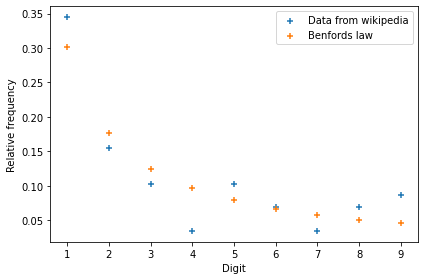

In [3]:
first_digits_int = first_digits(constants_int, factor=1)

first_digits_int = np.array(first_digits_int)
values_str, counts = np.unique(first_digits_int, return_counts=True)
counts = counts / np.sum(counts)

# plotting
plt.clf()
d = np.arange(1,10,1)
plt.scatter(values_str, counts, 
            label='Data from wikipedia',
           marker='+')
plt.scatter(d, np.log10(1 + 1/d), 
            label='Benfords law',
           marker='+')

plt.xlabel('Digit')
plt.ylabel('Relative frequency')
plt.legend()
plt.tight_layout()
plt.savefig('build/Ex4-decimal.pdf')
# we can look at the plot and can see that it kind of behaves like the law suggests

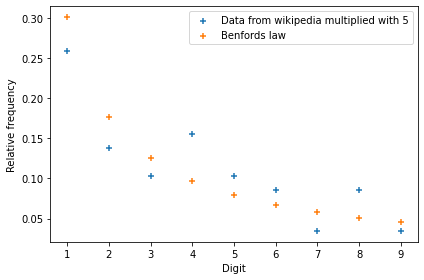

In [4]:
first_digits_int = first_digits(constants_int, factor=5)

first_digits_int = np.array(first_digits_int)
values_str, counts = np.unique(first_digits_int, return_counts=True)
counts = counts / np.sum(counts)

# plotting
plt.clf()
d = np.arange(1,10,1)
plt.scatter(values_str, counts, 
            label='Data from wikipedia multiplied with 5',
           marker='+')
plt.scatter(d, np.log10(1 + 1/d), 
            label='Benfords law',
           marker='+')

plt.xlabel('Digit')
plt.ylabel('Relative frequency')
plt.legend()
plt.tight_layout()

plt.savefig('build/Ex4-decimal-factor5.pdf')
# we can look at the plot and can see that it kind of behaves like the law suggests

## Doing the same for octal, haxadecimal

In [5]:
constants_octal = [oct(var) for var in constants_int]
constants_hexadec = [hex(var) for var in constants_int]

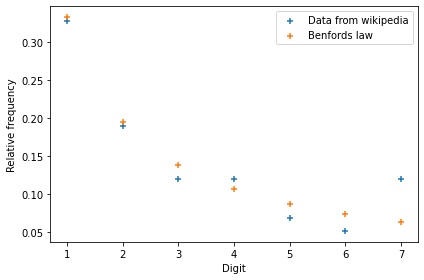

In [6]:
first_digits_int = first_digits(constants_octal, system='octal')

first_digits_int = np.array(first_digits_int)
values_str, counts = np.unique(first_digits_int, return_counts=True)
values_str = [int(res) for res in values_str]
counts = counts / np.sum(counts)

# plotting
plt.clf()
d = np.arange(1,8,1)
plt.scatter(values_str, counts, 
            label='Data from wikipedia',
           marker='+')
plt.scatter(d, np.log2(1 + 1/d)  * math.log(2,8), 
            label='Benfords law',
           marker='+')

plt.xlabel('Digit')
plt.ylabel('Relative frequency')
plt.legend()
plt.tight_layout()

plt.savefig('build/Ex4-octal.pdf')
# we can look at the plot and can see that it kind of behaves like the law suggests

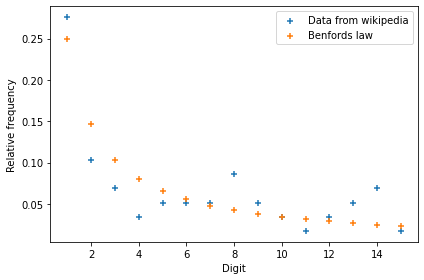

In [7]:
first_digits_int = first_digits(constants_hexadec, system='octal')

first_digits_int = np.array(first_digits_int)
values_str, counts = np.unique(first_digits_int, return_counts=True)
values_str[9:] = ['10', '11', '12', '13', '14', '15']
values_str = [int(res) for res in values_str]
values_str[9:] = [10, 11, 12, 13, 14, 15]


counts = counts / np.sum(counts)

# plotting
plt.clf()
d = np.arange(1,16,1)
plt.scatter(values_str, counts, 
            label='Data from wikipedia',
           marker='+')
plt.scatter(d, np.log2(1 + 1/d) * math.log(2,16), 
            label='Benfords law',
           marker='+')

plt.xlabel('Digit')
plt.ylabel('Relative frequency')
plt.legend()
plt.tight_layout()

plt.savefig('build/Ex4-hexadec.pdf')
# we can look at the plot and can see that it kind of behaves like the law suggests